Princinpal Component Analysis

(771, 9)
     preg   plas  pres  skin  test  mass   pedi   age  diab_class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0           0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0           0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN           0
3

 The total number of PCA components:  2

 ------ PCA transformation, 2D view of data and variance --------
 
Explained variance: 
 [0.77761576 0.13653358]

 ---------- Data splitting and pca transformation of splitted data ------

 The initial dimension: 
  (539, 8)

 Dimension after PCA: 
  (539, 2)

 --------------- Declaring the model both linear regression and decision tree ----------- 


 --------------- Fitting for PCA data in components ----------- 

mean absolute error: 0.04
mean squared error: 0.00
root mean squared error: 0.06
R2 score: 0.42

 --------------- Fitting for PCA data in components without pca model ----------- 

mean absolute error: 0.04
mean squared error: 0.00
root mean squared error: 0.05


C:\Users\dagbo\com624_machine_learning\Dimension_reduction\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\dagbo\com624_machine_learning\Dimension_reduction\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


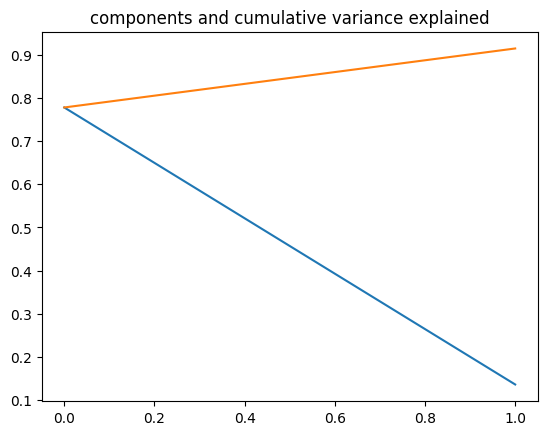

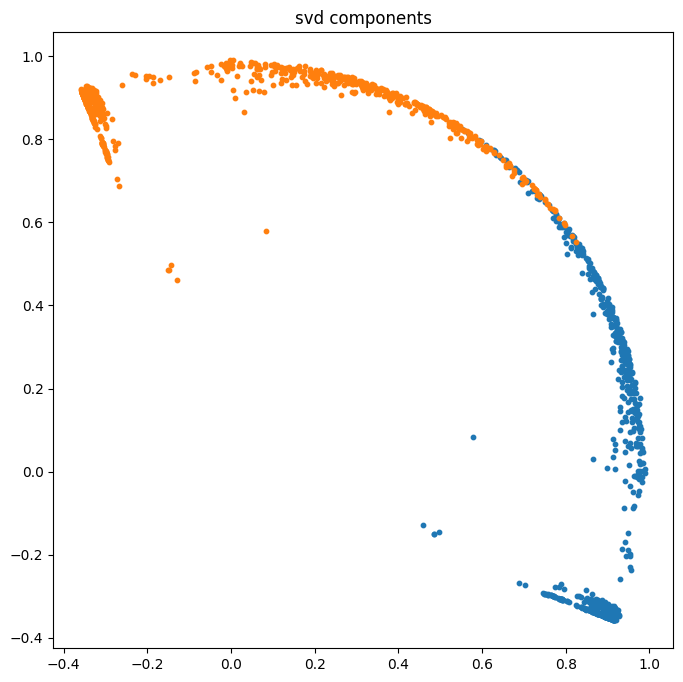

In [5]:
import matplotlib.pyplot as plt
#Factor analysis
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LinearRegression,LogisticRegression

#load the data into a dataframe
header_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diab_class']
my_data = pd.read_csv(r'pima_indians_diabetes_2 (1).csv', names=header_names)

#get the dimension of the shape
print(my_data.shape)

#get the row with empty values
empty_values = my_data[my_data.isna().any(axis=1)]
print(empty_values)
print(len(empty_values))

#use the simple imputer function to replace the empty values in the dataframe
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(my_data)
new_data = imputer.transform(my_data)


#normalise the dataset
diab_data_normalizer = Normalizer(norm='l2').fit(new_data)
my_normalised_data = diab_data_normalizer.transform(new_data)
my_data = pd.DataFrame(my_normalised_data, columns=header_names)

#convert the data back to dataframe and bind the headers as required
#my_data = pd.DataFrame(new_data, columns=header_names)

#extract the x data - independent variables
X_data = my_data.drop(['age'], axis=1)
y_data = my_data.pop('age')

#set pca to capture 90% data representation
pca = PCA(0.90)
pca.fit(X_data)
#get the number components
no_comp = pca.n_components_
print('\n The total number of PCA components: ', no_comp)
print('\n ------ PCA transformation, 2D view of data and variance --------\n ')
pca = PCA(n_components=2, svd_solver='full')
pca_result =  pca.fit_transform(X_data.values)

svd = TruncatedSVD(random_state=1).fit_transform(X_data.values)

#plot the PCA in 2D
plt.plot(range(2), pca.explained_variance_ratio_)
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_))
plt.title('components and cumulative variance explained')
plt.figure(figsize=(8,8))
plt.title('svd components')
plt.scatter(svd[:,0], svd[:,1], s=10)
plt.scatter(svd[:,1], svd[:,0], s=10)

print('Explained variance: \n', pca.explained_variance_ratio_)
print('\n ---------- Data splitting and pca transformation of splitted data ------')
#split data into 70:30 train test split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)
train_img_pca = pca.transform(X_train)
test_img_pca = pca.transform(X_test)

print('\n The initial dimension: \n ', X_train.shape)
print('\n Dimension after PCA: \n ', train_img_pca.shape)

print('\n --------------- Declaring the model both linear regression and decision tree ----------- \n')
lr= LinearRegression()
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.3, random_state=1)

print('\n --------------- Fitting for PCA data in components ----------- \n')
lr.fit(train_img_pca, y_train)
y_pred = lr.predict(test_img_pca) #predict model
#print(y_pred)

#evaluate the data -PCA components
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#printing the model evaluation values for pca
print('mean absolute error: {:.2f}' .format(mae))
print('mean squared error: {:.2f}' .format(mse))
print('root mean squared error: {:.2f}' .format(rmse))
print('R2 score: {:.2f}' .format(r2))

print('\n --------------- Fitting for PCA data in components without pca model ----------- \n')
#fit the regression model for the actual data set without pca
lr.fit(X_train, y_train)
#predict the model
y_pred = lr.predict(X_test)
#print(y_pred)

#evaluate the data -PCA components
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#printing the model evaluation values for pca
print('mean absolute error: {:.2f}' .format(mae))
print('mean squared error: {:.2f}' .format(mse))
print('root mean squared error: {:.2f}' .format(rmse))
print('R2 score: {:.2f}' .format(r2))
